In [277]:
import pandas as pd

In [278]:
data=pd.read_csv(r"/content/final_data.csv")

In [279]:
data.head(10)

,age,education,occupation,hours-per-week,gender,salary
0,25,11th,Machine-op-inspct,40,Male,<=50K
1,38,HS-grad,Farming-fishing,50,Male,<=50K
2,28,Assoc-acdm,Protective-serv,40,Male,>50K
3,44,Some-college,Machine-op-inspct,40,Male,>50K
4,18,Some-college,?,30,Female,<=50K
5,34,10th,Other-service,30,Male,<=50K
6,29,HS-grad,?,40,Male,<=50K
7,63,Prof-school,Prof-specialty,32,Male,>50K
8,24,Some-college,Other-service,40,Female,<=50K
9,55,7th-8th,Craft-repair,10,Male,<=50K


In [280]:
data.tail(3)

,age,education,occupation,hours-per-week,gender,salary
48839,58,HS-grad,Adm-clerical,40,Female,<=50K
48840,22,HS-grad,Adm-clerical,20,Male,<=50K
48841,52,HS-grad,Exec-managerial,40,Female,>50K


In [281]:
data.shape

(48842, 6)

In [282]:
#null values
data.isna().sum() #mean mdeian mode arbitrary

,0
age,0
education,0
occupation,0
hours-per-week,0
gender,0
salary,0


In [283]:
print(data['occupation'].value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [284]:
data.occupation.replace({'?':'Others'},inplace=True)
print(data['occupation'].value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Others               2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


/tmp/ipython-input-284-1148816719.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.occupation.replace({'?':'Others'},inplace=True)


In [285]:
print(data.gender.value_counts())

gender
Male      32650
Female    16192
Name: count, dtype: int64


In [286]:
data.shape

(48842, 6)

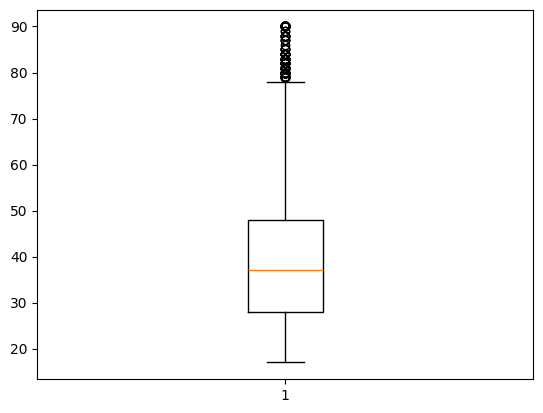

In [287]:
#outlier detection
import matplotlib.pyplot as plt   #visualization
plt.boxplot(data['age'])
plt.show()

In [288]:
data=data[(data['age']<=75)&(data['age']>=17)]

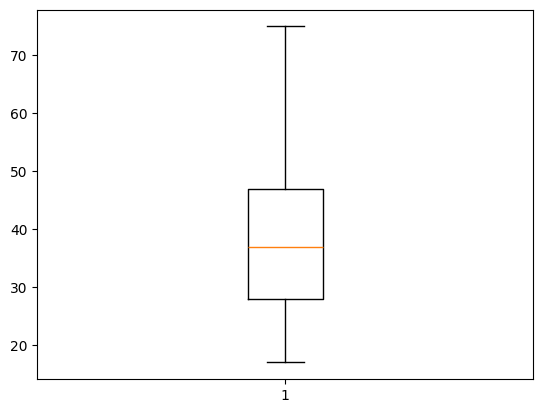

In [289]:
plt.boxplot(data['age'])
plt.show()

In [290]:
data.shape

(48469, 6)

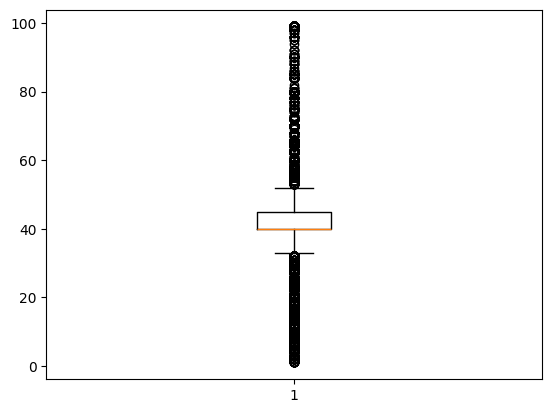

In [291]:
plt.boxplot(data['hours-per-week'])
plt.show()

In [292]:
data.shape

(48469, 6)

In [293]:
data

,age,education,occupation,hours-per-week,gender,salary
0,25,11th,Machine-op-inspct,40,Male,<=50K
1,38,HS-grad,Farming-fishing,50,Male,<=50K
2,28,Assoc-acdm,Protective-serv,40,Male,>50K
3,44,Some-college,Machine-op-inspct,40,Male,>50K
4,18,Some-college,Others,30,Female,<=50K
...,...,...,...,...,...,...
48837,27,Assoc-acdm,Tech-support,38,Female,<=50K
48838,40,HS-grad,Machine-op-inspct,40,Male,>50K
48839,58,HS-grad,Adm-clerical,40,Female,<=50K
48840,22,HS-grad,Adm-clerical,20,Male,<=50K


In [294]:
from sklearn.preprocessing import LabelEncoder   #import libarary
encoder=LabelEncoder()                       #create object
data['age']=encoder.fit_transform(data['age'])
data['education']=encoder.fit_transform(data['education'])
data['occupation']=encoder.fit_transform(data['occupation'])
data['hours-per-week']=encoder.fit_transform(data['hours-per-week'])
data['gender']=encoder.fit_transform(data['gender'])

In [295]:
data

,age,education,occupation,hours-per-week,gender,salary
0,8,1,6,39,1,<=50K
1,21,11,4,49,1,<=50K
2,11,7,11,39,1,>50K
3,27,15,6,39,1,>50K
4,1,15,8,29,0,<=50K
...,...,...,...,...,...,...
48837,10,7,13,37,0,<=50K
48838,23,11,6,39,1,>50K
48839,41,11,0,39,0,<=50K
48840,5,11,0,19,1,<=50K


In [296]:
x=data.drop(columns=['salary'])
y=data['salary']
x

,age,education,occupation,hours-per-week,gender
0,8,1,6,39,1
1,21,11,4,49,1
2,11,7,11,39,1
3,27,15,6,39,1
4,1,15,8,29,0
...,...,...,...,...,...
48837,10,7,13,37,0
48838,23,11,6,39,1
48839,41,11,0,39,0
48840,5,11,0,19,1


In [297]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


LogisticRegression Accuracy: 0.7592
              precision    recall  f1-score   support

       <=50K       0.78      0.95      0.86      7343
        >50K       0.51      0.15      0.24      2351

    accuracy                           0.76      9694
   macro avg       0.65      0.55      0.55      9694
weighted avg       0.71      0.76      0.71      9694

RandomForest Accuracy: 0.7858
              precision    recall  f1-score   support

       <=50K       0.84      0.89      0.86      7343
        >50K       0.57      0.47      0.51      2351

    accuracy                           0.79      9694
   macro avg       0.71      0.68      0.69      9694
weighted avg       0.77      0.79      0.78      9694

KNN Accuracy: 0.7845
              precision    recall  f1-score   support

       <=50K       0.84      0.89      0.86      7343
        >50K       0.57      0.46      0.51      2351

    accuracy                           0.78      9694
   macro avg       0.70      0.67      0.

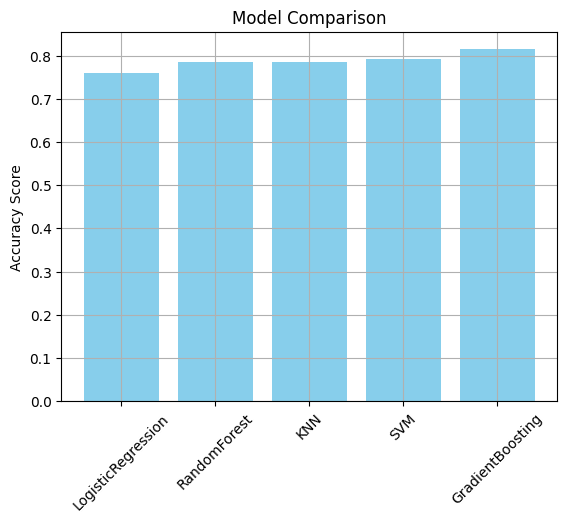

In [298]:
import matplotlib.pyplot as plt
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [299]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define models
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"{name}: {acc:.4f}")

# Get best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\n✅ Best model: {best_model_name} with accuracy {results[best_model_name]:.4f}")

# Save the best model
joblib.dump(best_model, "best_model.pkl")
print("✅ Saved best model as best_model.pkl")


LogisticRegression: 0.7592
RandomForest: 0.7878
KNN: 0.7790
SVM: 0.7607
GradientBoosting: 0.8141

✅ Best model: GradientBoosting with accuracy 0.8141
✅ Saved best model as best_model.pkl


In [300]:
!pip install -q streamlit

In [301]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder

# Load the trained model
model = joblib.load("best_model.pkl")

# Load the original data to fit the LabelEncoders
# This assumes your original data with categorical columns is available
# If not, you would need to save and load the fitted encoders separately
try:
    original_data = pd.read_csv(r"/content/final_data.csv")
except FileNotFoundError:
    st.error("Error: original_data.csv not found. Please make sure the file exists in the correct path.")
    st.stop()

# Fit LabelEncoders for each categorical column used in training
education_encoder = LabelEncoder()
occupation_encoder = LabelEncoder()
gender_encoder = LabelEncoder()

# Filter out '?' and replace with 'Others' for occupation
education_classes = [c for c in original_data['education'].unique() if c != '?']
occupation_classes = [c if c != '?' else 'Others' for c in original_data['occupation'].unique()]
gender_classes = [c for c in original_data['gender'].unique() if c != '?']


education_encoder.fit(education_classes)
occupation_encoder.fit(occupation_classes)
gender_encoder.fit(gender_classes)


st.set_page_config(page_title="Employee Salary Prediction", page_icon="💼", layout="centered")

st.title("💼 Employee Salary Prediction App")
st.markdown("Predict whether an employee earns >50K or ≤50K based on input features.")

# Sidebar inputs (these must match your training feature columns)
st.sidebar.header("Input Employee Details")

# ✨ Replace these fields with your dataset's actual input columns
age = st.sidebar.slider("Age", 17, 75, 30) # Adjusted age range based on data cleaning
# Use the fitted encoders to get the list of classes for the selectbox
education = st.sidebar.selectbox("Education Level", education_classes)
gender = st.sidebar.selectbox("Gender", gender_classes)
occupation = st.sidebar.selectbox("Job Role", occupation_classes)
hours_per_week = st.sidebar.slider("Hours per week", 1, 99, 40) # Adjusted hours per week range based on data

# Build input DataFrame (⚠️ must match preprocessing of your training data)
input_df = pd.DataFrame({
    'age': [age],
    'education': [education],
    'occupation': [occupation],
    'hours-per-week': [hours_per_week],
    'gender' : [gender],
})

# Preprocess the input data using the fitted encoders
input_df['education'] = education_encoder.transform(input_df['education'])
input_df['occupation'] = occupation_encoder.transform(input_df['occupation'])
input_df['gender'] = gender_encoder.transform(input_df['gender'])


st.write("### 🔎 Input Data (after preprocessing)")
st.write(input_df)

# Predict button
if st.button("Predict Salary Class"):
    prediction = model.predict(input_df)
    st.success(f"✅ Prediction: {prediction[0]}")

# Batch prediction
st.markdown("---")
st.markdown("#### 📂 Batch Prediction")
uploaded_file = st.file_uploader("Upload a CSV file for batch prediction", type="csv")

if uploaded_file is not None:
    batch_data = pd.read_csv(uploaded_file)
    st.write("Uploaded data preview:", batch_data.head())

    # Apply the same preprocessing to batch data
    try:
        batch_data['education'] = education_encoder.transform(batch_data['education'])
        # Handle potential '?' values in occupation column if they might be in the uploaded file
        batch_data['occupation'] = batch_data['occupation'].replace('?', 'Others')
        batch_data['occupation'] = occupation_encoder.transform(batch_data['occupation'])
        batch_data['gender'] = gender_encoder.transform(batch_data['gender'])
    except ValueError as e:
        st.error(f"Error during batch data preprocessing: {e}. Please ensure the uploaded CSV contains valid data for education, occupation, and gender based on the training data.")
        st.stop()


    batch_preds = model.predict(batch_data)
    batch_data['PredictedClass'] = batch_preds
    st.write("✅ Predictions:")
    st.write(batch_data.head())
    csv = batch_data.to_csv(index=False).encode('utf-8')
    st.download_button("Download Predictions CSV", csv, file_name='predicted_classes.csv', mime='text/csv')

Overwriting app.py


In [304]:
!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.121.246.18:8501

  Stopping...
^C
